# Análisis: seguro de vehículos


Una empresa de seguros de salud quiere ofrecer a sus antiguos clientes un nuevo seguro de vehículos. Necesita nuestro servicio para crear un modelo que prediga si un cliente estaría interesado en este nuevo seguro.

Tenemos un conjunto de datos con los siguientes valores:

| Variable | Definición |
| --- | --- |
| id | Identificador único |
| Gender | Género del cliente (M/F) |
| Age | Edad del cliente |
| Driving_License | El cliente tiene carnet de conducir (1/0) |
| Region_Code | Código de la región del cliente |
| Previously_Insured | El cliente ya tiene seguro de coche (1/0) |
| Vehicle_Age | Años del vehículo |
| Vehicle_Damage | El cliente ha sufrido daños en su vehículo anteriormente (1/0) |
| Annual_Premium | Cantidad a pagar por el nuevo seguro |
| Plocy_Sales_Channel | Canal por el que se localiza al cliente (e-mail, teléfono, en persona, etc) |
| Vintage | Número de días del cliente con la compañía |
| Response | Respuesta si o no (1/0) |

### Problema de clasificación

## Importando y dividiendo Dataset

Importamos librerías necesarias y cargamos los dataset de entrenamiento y prueba desde la carpeta /res

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


train = pd.read_csv('../res/train.csv')
x = train.iloc[:, 1:-1] # Training Dataset without dependient variable and index (pandas index = dataset index - 1)
y = train.iloc[:, -1] # Training Dependient variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

test_final = pd.read_csv('../res/test_final.csv').iloc[:, 1:] # Test Dataset variable and index (pandas index = dataset index - 1)

## Previsualización

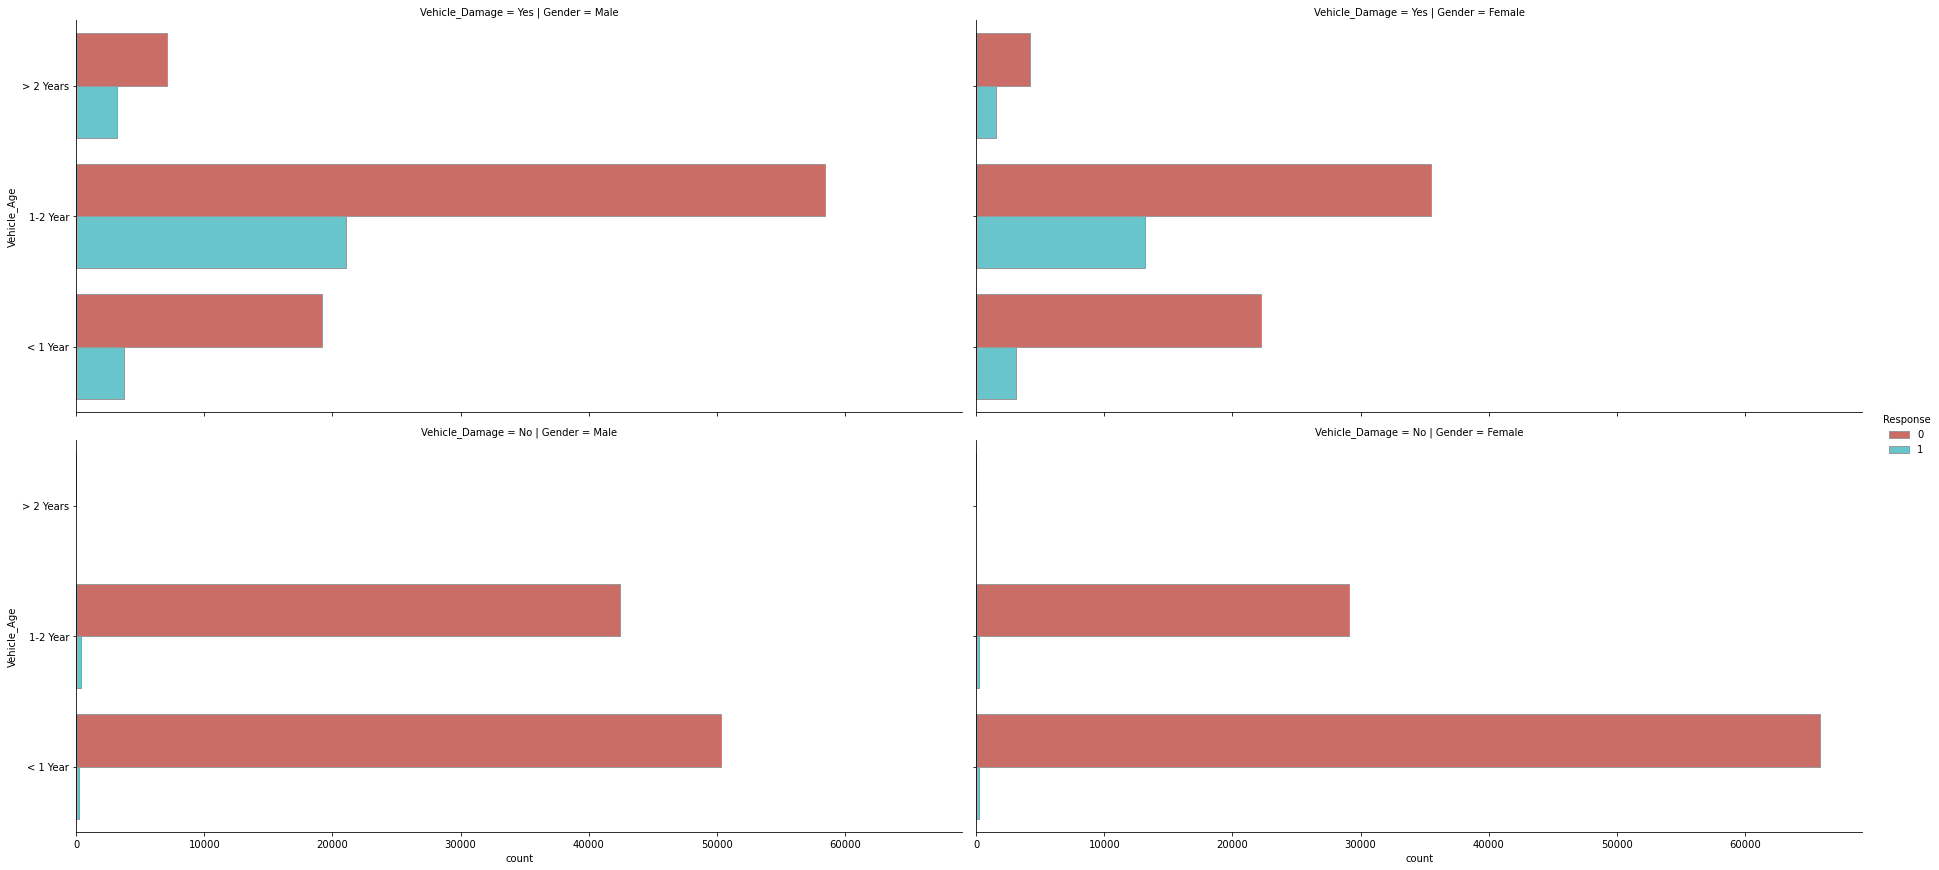

In [88]:
g = sns.catplot(y='Vehicle_Age', hue="Response", col='Gender', row='Vehicle_Damage', kind="count", height=6, aspect=13/6, legend=True, palette='hls', edgecolor=".6", data=train)

## Preprocesado y limpieza del Dataset

### Valores categóricos

Convertimos los valores categóricos en valores booleanos.

In [75]:
# Generate boolean values for categorical columns 
le = LabelEncoder()
x_train = pd.get_dummies(x_train, columns=['Gender', 'Vehicle_Age', 'Policy_Sales_Channel', 'Region_Code'], prefix=['Gender', 'Vehicle_Age', 'Policy_Sales_Channel', 'Region_Code'])
x_train['Vehicle_Damage'] = le.fit_transform(x_train['Vehicle_Damage']) # Yes -> 1 | No -> 0

x_test = pd.get_dummies(x_test, columns=['Gender', 'Vehicle_Age', 'Policy_Sales_Channel', 'Region_Code'], prefix=['Gender', 'Vehicle_Age', 'Policy_Sales_Channel', 'Region_Code'])
x_test['Vehicle_Damage'] = le.fit_transform(x_test['Vehicle_Damage']) # Yes -> 1 | No -> 0

display(x_train)
display(x_test)

# Reordering columns so categorical data are the last columns
cols = list(x_train.columns)
cols = cols[0:1] + cols[4:6] + cols[1:4] + cols[4:]
x_train = x_train[cols]

# Get missing columns in the training test
missing_cols = set( x_train.columns ) - set( x_test.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    x_test[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
x_test = x_test[x_train.columns]

display(x_train)
display(x_test)

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
215357,31,1,0,1,27280.0,204,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
262812,43,1,1,0,2630.0,147,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
291557,25,1,1,1,2630.0,95,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
197937,53,1,0,1,45919.0,114,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
259434,26,1,1,0,55147.0,113,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,27,1,1,0,33223.0,220,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
358083,53,1,0,1,40971.0,131,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
152315,22,1,1,0,30400.0,118,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
117952,56,1,0,1,34849.0,229,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
220145,24,1,1,0,38744.0,267,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
194704,41,1,0,1,24929.0,156,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
203625,72,1,0,1,113486.0,70,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
218048,43,1,0,1,2630.0,209,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
230458,25,1,1,1,62383.0,20,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173172,62,1,0,1,32336.0,128,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
25252,23,1,1,0,2630.0,144,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
50493,26,1,1,0,39125.0,240,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
326182,49,1,0,1,37143.0,72,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


,Age,Annual_Premium,Vintage,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
215357,31,27280.0,204,1,0,1,27280.0,204,0,1,...,0,0,0,0,0,0,0,0,0,0
262812,43,2630.0,147,1,1,0,2630.0,147,0,1,...,0,0,0,0,0,1,0,0,0,0
291557,25,2630.0,95,1,1,1,2630.0,95,0,1,...,0,0,0,1,0,0,0,0,0,0
197937,53,45919.0,114,1,0,1,45919.0,114,0,1,...,0,0,0,0,0,0,0,0,0,0
259434,26,55147.0,113,1,1,0,55147.0,113,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,27,33223.0,220,1,1,0,33223.0,220,0,1,...,0,0,0,0,0,0,0,0,0,0
358083,53,40971.0,131,1,0,1,40971.0,131,1,0,...,0,0,0,1,0,0,0,0,0,0
152315,22,30400.0,118,1,1,0,30400.0,118,0,1,...,0,0,1,0,0,0,0,0,0,0
117952,56,34849.0,229,1,0,1,34849.0,229,1,0,...,1,0,0,0,0,0,0,0,0,0


,Age,Annual_Premium,Vintage,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
220145,24,38744.0,267,1,1,0,38744.0,267,1,0,...,0,0,0,0,0,0,0,0,0,0
194704,41,24929.0,156,1,0,1,24929.0,156,1,0,...,0,0,0,0,0,0,0,0,0,0
203625,72,113486.0,70,1,0,1,113486.0,70,1,0,...,0,0,0,0,0,0,0,0,0,0
218048,43,2630.0,209,1,0,1,2630.0,209,0,1,...,0,0,0,0,1,0,0,0,0,0
230458,25,62383.0,20,1,1,1,62383.0,20,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173172,62,32336.0,128,1,0,1,32336.0,128,0,1,...,0,0,0,0,0,0,0,0,0,0
25252,23,2630.0,144,1,1,0,2630.0,144,0,1,...,0,0,0,0,0,0,0,0,0,0
50493,26,39125.0,240,1,1,0,39125.0,240,1,0,...,0,0,0,0,0,0,0,0,0,0
326182,49,37143.0,72,1,0,1,37143.0,72,0,1,...,0,0,0,0,0,0,0,0,0,0


### Estandarización

Estandarizamos los valores continuos para no confudir los futuros análisis

In [76]:
# Continous variables standarization
sc = StandardScaler()
x_train.iloc[:, :3] = sc.fit_transform(x_train.iloc[:, :3])
x_test.iloc[:, :3] = sc.fit_transform(x_test.iloc[:, :3])
display(x_train)

,Age,Annual_Premium,Vintage,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
215357,-0.503537,-0.191750,0.594647,1,0,1,27280.0,204,0,1,...,0,0,0,0,0,0,0,0,0,0
262812,0.269987,-1.627038,-0.086343,1,1,0,2630.0,147,0,1,...,0,0,0,0,0,1,0,0,0,0
291557,-0.890300,-1.627038,-0.707598,1,1,1,2630.0,95,0,1,...,0,0,0,1,0,0,0,0,0,0
197937,0.914591,0.893537,-0.480601,1,0,1,45919.0,114,0,1,...,0,0,0,0,0,0,0,0,0,0
259434,-0.825839,1.430853,-0.492548,1,1,0,55147.0,113,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,-0.761379,0.154291,0.785802,1,1,0,33223.0,220,0,1,...,0,0,0,0,0,0,0,0,0,0
358083,0.914591,0.605431,-0.277499,1,0,1,40971.0,131,1,0,...,0,0,0,1,0,0,0,0,0,0
152315,-1.083681,-0.010083,-0.432812,1,1,0,30400.0,118,0,1,...,0,0,1,0,0,0,0,0,0,0
117952,1.107972,0.248968,0.893327,1,0,1,34849.0,229,1,0,...,1,0,0,0,0,0,0,0,0,0


## Análisis predictivo

### Análisis logístico

In [77]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=400)
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)

Precisión del modelo:  0.8757489088889472
REPORT:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.25      0.00      0.01     14092

    accuracy                           0.88    114333
   macro avg       0.57      0.50      0.47    114333
weighted avg       0.80      0.88      0.82    114333



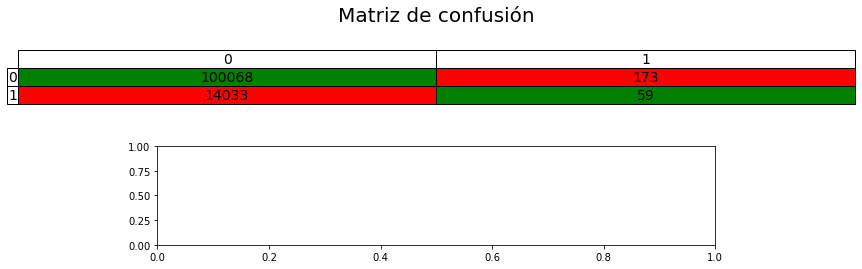

In [78]:
cm = confusion_matrix(y_test, predictions)
acsc = accuracy_score(predictions, y_test)

print('Precisión del modelo: ', acsc)
print('REPORT:\n', classification_report(y_test, predictions))

fig, ax =plt.subplots(2, 1, figsize=(10,4))

labels =['0', '1']
ax[0].axis('tight')
ax[0].axis('off')
colors = [['g', 'r'],[ 'r', 'g']]

conf_matrix_table = ax[0].table(   cellText = cm, 
                                    colLabels = labels,
                                    rowLabels = labels,    
                                    loc = 'center',   
                                    cellColours = colors, 
                                    cellLoc = 'center')


ax[0].set_title('Matriz de confusión', fontsize = 20)
conf_matrix_table.auto_set_font_size(False)
conf_matrix_table.set_fontsize(8)
conf_matrix_table.set_fontsize(14)
conf_matrix_table.scale(1.5, 1.5)

#sns.scatterplot(data=x_test, y='Region_Code', ax=ax[1])

#plt.show()

In [80]:
x_test['Response'] = y_test
x_test['Prediction'] = predictions.tolist()

display(x_test[x_test['Prediction'] == 1].head(50))

,Age,Annual_Premium,Vintage,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,...,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0,Response,Prediction
122533,0.203242,0.037685,-0.222826,0,0,1,31196.0,136,0,1,...,0,0,0,0,0,0,0,0,0,1
350110,-1.150957,0.439916,-0.210864,1,0,1,38156.0,137,0,1,...,0,0,0,0,0,0,0,0,0,1
85305,-0.828529,-1.613196,-1.227617,1,0,1,2630.0,52,1,0,...,0,0,0,0,0,0,0,0,0,1
274842,-1.021986,1.346381,-0.174979,1,0,1,53841.0,140,0,1,...,0,0,0,0,0,0,0,0,0,1
230870,-1.021986,0.436333,-0.450100,1,0,1,38094.0,117,0,1,...,0,0,0,0,0,0,0,0,0,1
370795,-0.699557,-0.485562,-1.191731,1,0,1,22142.0,55,0,1,...,0,0,0,0,0,0,0,0,1,1
104373,-1.150957,-1.613196,1.081010,1,0,1,2630.0,245,1,0,...,0,0,0,0,0,0,0,0,0,1
324070,-1.086471,0.067275,-1.454891,1,0,1,31708.0,33,0,1,...,0,0,0,0,0,0,0,0,0,1
283846,-1.086471,-1.613196,0.793927,1,0,1,2630.0,221,0,1,...,0,0,0,0,0,0,0,0,0,1
257274,-0.570586,0.221637,-1.514700,1,0,1,34379.0,28,0,1,...,0,0,0,0,0,0,0,0,0,1


#### Visualización del modelo

ValueError: operands could not be broadcast together with shapes (285831,13) (6,) (285831,13) 